# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv('marketing_inversiones.csv')

In [4]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [6]:
import plotly.express as px

In [7]:
# text auto son las cajas de texto que contienen el valor y se colocan encima de cada grafica
px.histogram(datos, x='adherencia_inversion',text_auto=True)

In [8]:
# barmode='group' es para hacer una grafica de barras agrupadas
# color='adherencia_inversion es para clasificar la columna estado_civil en si y no de adherencia_inversion

# en otras palabras, es para saber quienes estan en el programa de inversion separandolos por grupos de 
# casado, divorciado y soltero
px.histogram(datos, x='estado_civil',text_auto=True, color='adherencia_inversion',barmode='group')

In [9]:
px.histogram(datos, x='escolaridad',text_auto=True, color='adherencia_inversion',barmode='group')

In [10]:
px.histogram(datos, x='default',text_auto=True, color='adherencia_inversion',barmode='group')

In [11]:
px.histogram(datos, x='prestatario',text_auto=True, color='adherencia_inversion',barmode='group')

### Variables numéricas

In [12]:
px.box(datos,x='edad',color='adherencia_inversion')

In [13]:
px.box(datos,x='saldo',color='adherencia_inversion')

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [15]:
px.box(datos,x='ultimo_contacto',color='adherencia_inversion')

In [16]:
px.box(datos,x='ct_contactos',color='adherencia_inversion')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [17]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


In [18]:
X = datos.drop('adherencia_inversion',axis=1) # variable explicativa
y = datos['adherencia_inversion'] # variable respuesta

In [19]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [20]:
y

0       si
1       si
2       no
3       si
4       si
        ..
1263    si
1264    si
1265    si
1266    si
1267    si
Name: adherencia_inversion, Length: 1268, dtype: object

In [21]:
type(y)

pandas.core.series.Series

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

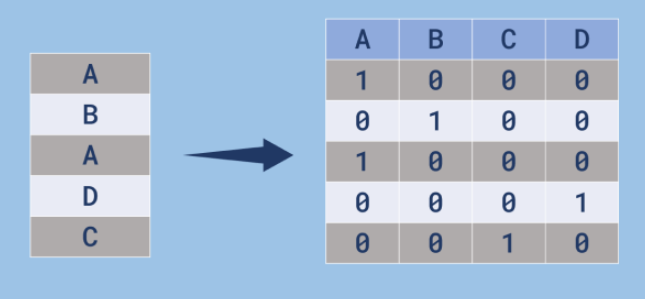

In [22]:
# make_column_transform nos ayuda a generar columnas especificas para los tipos de variables
# usamos OneHorEncoder para que todos los valores sean del mismo nivel

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
# guarda el nombre de las columnas de X

columnas = X.columns

In [24]:
# one_hot se le nombra modelo
# (OneHotEncoder(drop='if_binary') es una tupla que instancia el modelo OneHotEncoder afectando a todas
# las columnas de X excepto a las columnas binarias como default y prestatario

# lego pasamos los nombres de la variables (solo las categoricas [osea no numericas])
# remainder='passthrough' es para omitir las columnas queno se mencionan
# force_int_remainder_cols=False es para dejar intactas los nombres de las columnas

one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   ['estado_civil','escolaridad','default','prestatario']),
                                   remainder='passthrough',
                                   sparse_threshold=0,
                                   force_int_remainder_cols=False)

In [25]:
X = one_hot.fit_transform(X)

C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning:

The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.



In [26]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [27]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]], shape=(1268, 12))

In [28]:
one_hot

,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,False
,categories,'auto'
,drop,'if_binary'
,sparse_output,True


In [29]:
type(one_hot)

sklearn.compose._column_transformer.ColumnTransformer

In [30]:
type(X)

numpy.ndarray

In [31]:
# mejor visualizacion despues de transformar los datos
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# se utiliza el Objeto LabelEncoder para la variable objetivo
label_encoder = LabelEncoder()
type(label_encoder)

sklearn.preprocessing._label.LabelEncoder

In [34]:
y.head()

0    si
1    si
2    no
3    si
4    si
Name: adherencia_inversion, dtype: object

In [35]:
# convertimos los sí en 1 y los no en 0
y = label_encoder.fit_transform(y)
type(y)

numpy.ndarray

In [36]:
y

array([1, 1, 0, ..., 1, 1, 1], shape=(1268,))

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [38]:
# train_test_split es para conseguir el entrenamiento y la prueba
from sklearn.model_selection import train_test_split

In [44]:
# instanciamos/definimos variables con train_test_split()
# stratify=y hace misma salida de 0 y 1
X_test,X_train,y_test,y_train = train_test_split(X,y,stratify=y, random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [42]:
from sklearn.dummy import DummyClassifier

In [ ]:
# instanciamos o creamos el modelo que hara las pruebas a las clasificaciones
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test,y_test)

0.6046267087276551

El resultado arrojo 0.**6046267087276551** lo que significa que el modelo ``DummyClassifier()`` clasificó el 60% de las veces correctamente 

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
modelo_arbol.score(X_test,y_test)

0.6572029442691903

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [53]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

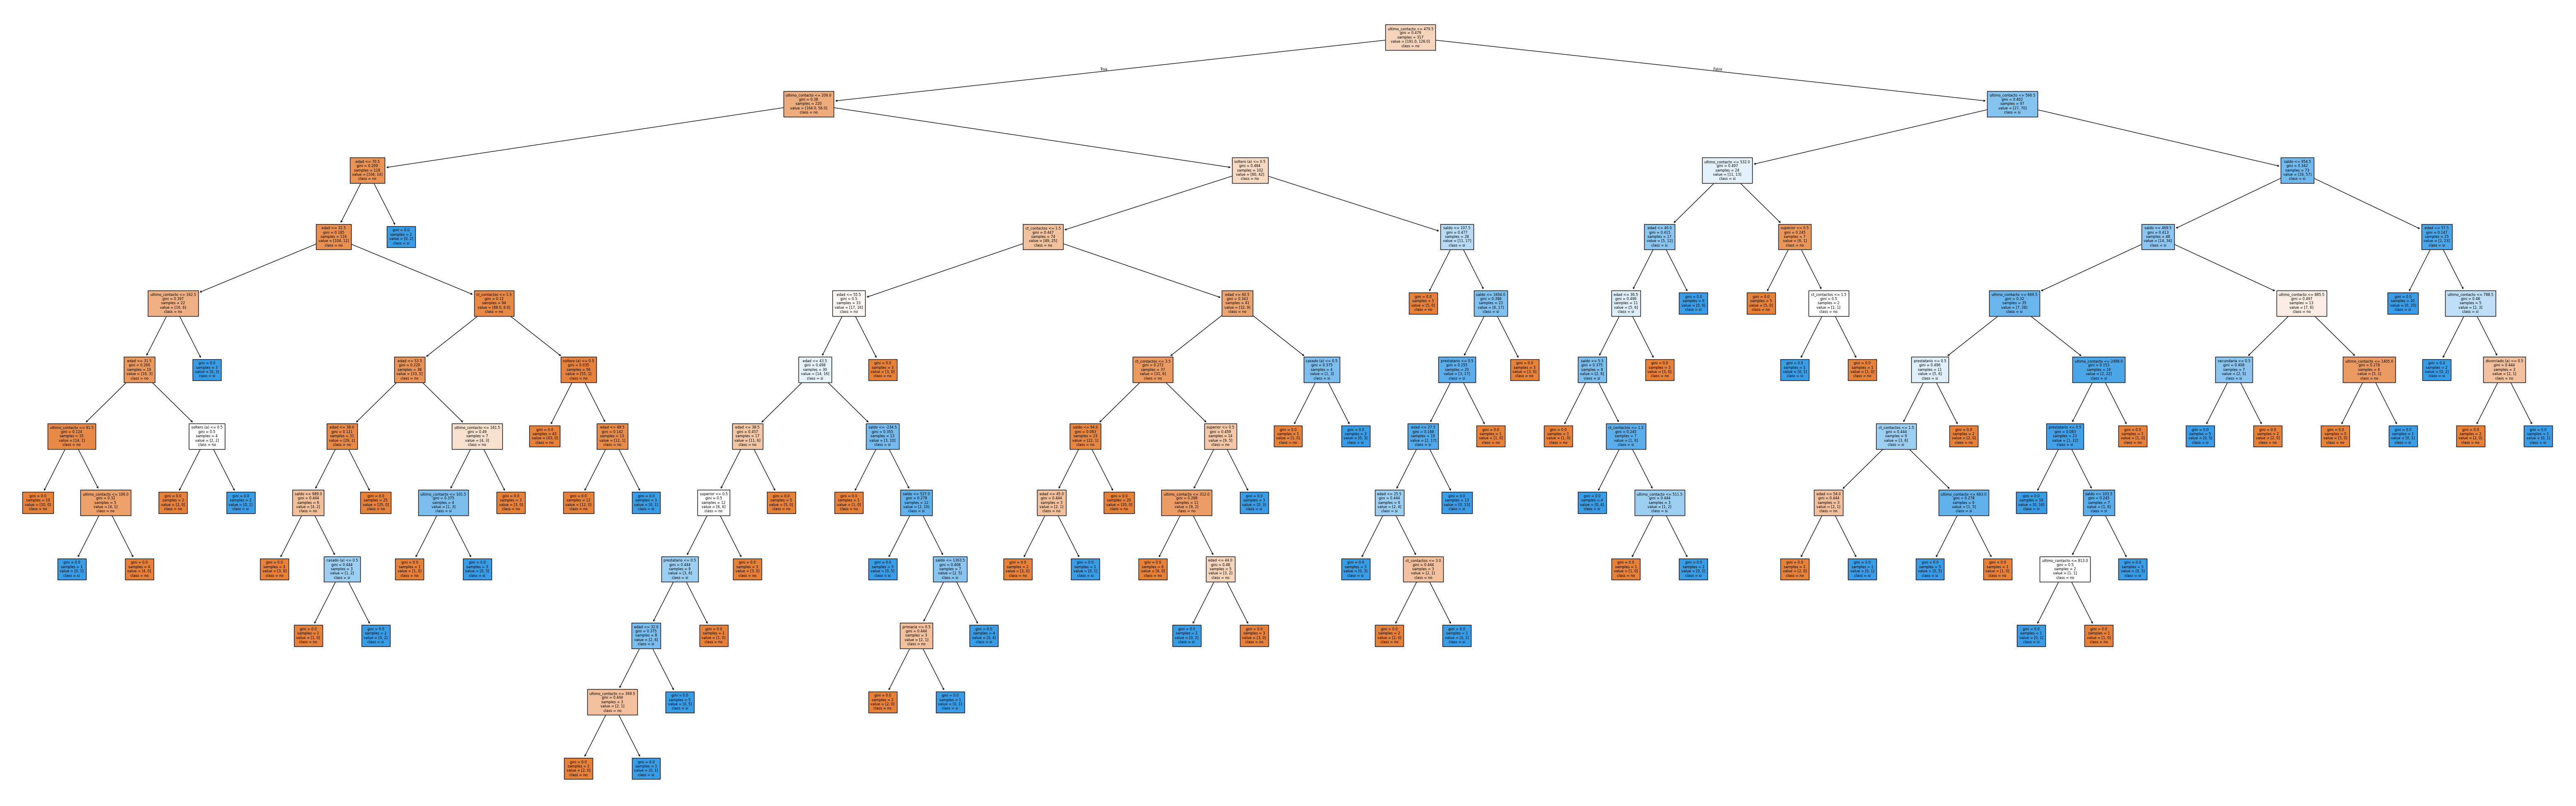

In [54]:
# el punto y coma al final es para no tener que escribir plt.show() al final
# filled es para rellenar los colores cuando es si y cuando es no para diferenciarlos mejor
# class_names es para mostrar los nombres de las clases 

plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True,class_names=['no','si'],fontsize=6,feature_names=valores_columnas);

In [55]:
modelo_arbol.score(X_train,y_train)

1.0

## Recrear el modelo de Árbol para BigData

In [56]:
# max_depth=3 es la profundidad maxima quele damos al arbol

modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [61]:
modelo_arbol.score(X_test,y_test)

0.7160883280757098

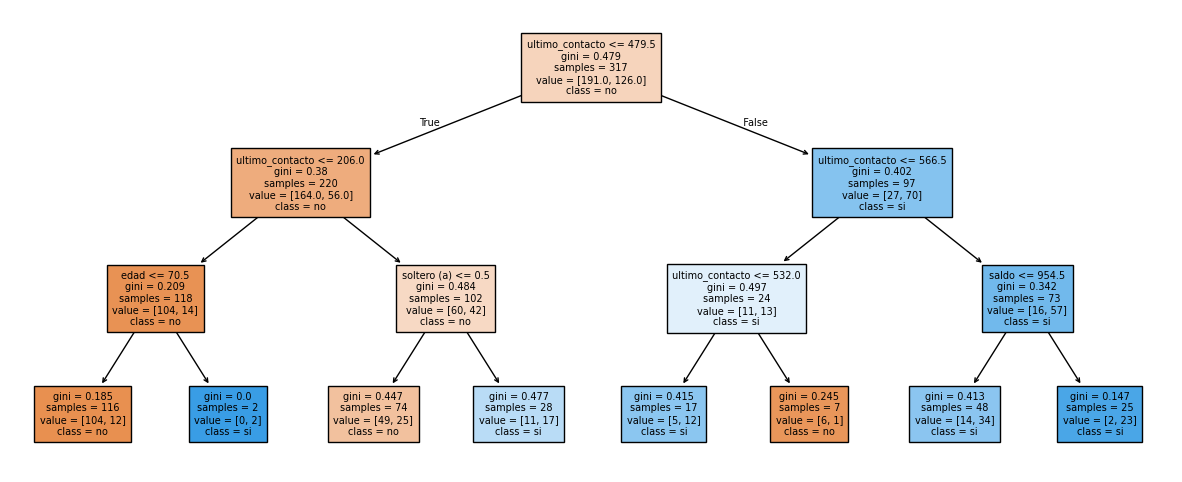

In [62]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol,filled=True,class_names=['no','si'],fontsize=7,feature_names=valores_columnas);

In [63]:
modelo_arbol.score(X_train,y_train)

0.7791798107255521

En Conclusion la profundidad ``max_depth=3`` es de 3 y no obtiene un resultado tan exacto, pero tambien hace menos procesamiento, y esto se utiliza para un set de BigData en donde hay muchos datos y la computadora no tiene tanto poder para procesar tantos datos. Entre mas profundidad mas procesamiento.

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
# se instancia una variable con la case MinMaxScaler()

normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [71]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.344828,0.025825,0.023580,0.096774
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.431034,0.114247,0.074726,0.096774
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.172414,0.056015,0.519761,0.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.206897,0.091033,0.183328,0.032258
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.568966,0.066674,0.109930,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
312,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.293103,0.056480,0.167054,0.000000
313,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.189655,0.076117,0.163069,0.032258
314,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.482759,0.067926,0.108270,0.032258
315,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.344828,0.100869,0.059117,1.000000


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [72]:
knn.fit(X_train_normalizado,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [75]:
# realiza transformacion de x de prueba
X_test_normalizado = normalizacion.transform(X_test)

In [77]:
knn.score(X_test_normalizado,y_test)

0.676130389064143

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [78]:
# imprime el score de todos los modelos en una misma celda

lista = [('dummy',dummy,X_test),('de árbol',modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
    print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy: 0.6046267087276551
La exactitud del modelo de árbol: 0.7160883280757098
La exactitud del modelo knn: 0.676130389064143


In [79]:
# exportar

import pickle

In [80]:
with open('modelo_onehotencoder.pkl','wb') as archivo:
    pickle.dump(one_hot,archivo)

In [81]:
with open('modelo_champion.pkl','wb') as archivo:
    pickle.dump(modelo_arbol,archivo)

In [82]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [83]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [85]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


In [87]:
modelo_one_hot = pd.read_pickle('modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('modelo_champion.pkl')

Se usa presdict para predecir si un nuevo dato se unira al programa de inversion

``el array([1])`` significa que ``si`` se unira al programa

``el array([0])`` significa que ``no`` se unira al programa

In [92]:
modelo_arbol.predict(nuevo_dato)

array([1])

Primero se usa one hot para aplcar la configuracion u transformarlo para el entendimiento del modelo de MAchine Learning

In [90]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)